## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

merge_df['Mouse ID'].value_counts(dropna=False)


g989    13
b559    10
c264    10
e584    10
l733    10
        ..
d133     1
t573     1
x226     1
v199     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merge_df.duplicated(keep=False)

#duplicate_rows = merge_df[merge_df.duplicated(["Mouse ID"]["Timepoint"], keep=False)]
#duplicate_rows

merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint']), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] !='g989']
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts(dropna=False)

b559    10
a685    10
y793    10
e584    10
l733    10
        ..
l872     1
x336     1
u153     1
v199     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_group_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_group_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_group_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_group_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_group_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary = {
    "Tumor Mean": tumor_group_mean,
    "Tumor Median": tumor_group_median,
    "Tumor Standard Deviation": tumor_group_std,
    "Tumor Variance": tumor_group_variance,
    "Tumor SEM": tumor_group_sem
}

tumor_summary_df = pd.DataFrame(tumor_summary)
tumor_summary_df


,Tumor Mean,Tumor Median,Tumor Standard Deviation,Tumor Variance,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

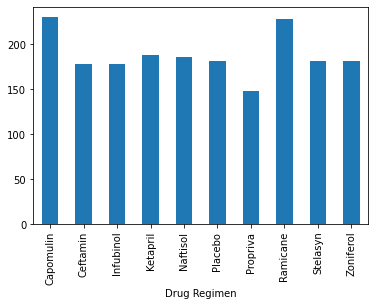

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_group = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

mouse_group.plot.bar("Drug Regimen", "Mouse ID")

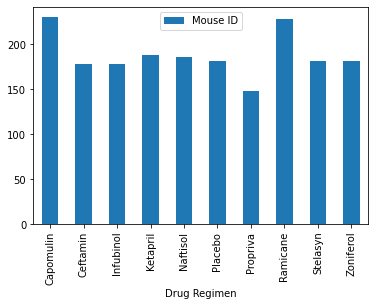

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_group_df = pd.DataFrame(mouse_group)
mouse_group_df.plot(kind='bar')


In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_df.groupby("Sex")["Mouse ID"].count()
mouse_gender

#df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
 #                  index=['Mercury', 'Venus', 'Earth'])
#>>> plot = df.plot.pie(y='mass', figsize=(5, 5))

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

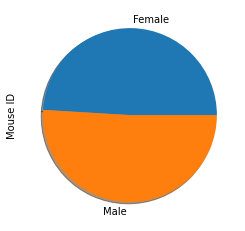

In [59]:

mouse_gender.groupby(['Sex']).sum().plot(kind='pie', y='Mouse ID', shadow = True)

([<matplotlib.patches.Wedge at 0x7ff98891a340>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7986423578309305, 0.8956396509078035, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.46587470873470943, 0.522456463029552, '51.0%')])

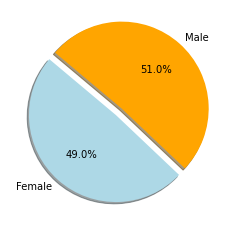

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
